In [40]:
import pandas as pd

In [41]:
SAFECAST_DATA_PATH = "F:\safecast\measurements-out.csv"
NUMBER_OF_ROWS = 1000000

In [42]:
df = pd.read_csv(SAFECAST_DATA_PATH, nrows=NUMBER_OF_ROWS)

In [43]:
df.head()

,Captured Time,Latitude,Longitude,Value,Unit,Location Name,Device ID,MD5Sum,Height,Surface,Radiation,Uploaded Time,Loader ID
0,2020-02-03 17:00:00,37.507552,139.941170,72.0,cpm,NaN,NaN,6449bbf7ce3b30a8e05bc23a0bc40644,NaN,NaN,NaN,2020-02-03 17:00:00,633.0
1,2020-02-03 11:00:00,37.507250,139.940000,55.0,cpm,NaN,NaN,2fa8bccef282796bcdc297679c4db5b3,NaN,NaN,NaN,2020-02-03 11:00:00,614.0
2,2020-02-03 11:00:00,37.505445,0.016667,68.0,cpm,NaN,NaN,a166df14f60b61095693684fc0f89c54,NaN,NaN,NaN,2020-02-03 11:00:00,614.0
3,2020-02-01 03:00:00,34.066487,-118.895217,50.0,cpm,NaN,NaN,da79c21520d3ff3f5ed010a70f4a6d29,NaN,NaN,NaN,2020-02-01 03:00:00,507.0
4,2020-02-01 01:00:00,37.673233,140.066667,48.0,cpm,NaN,NaN,6cdf740a2304a850185f74c0c4a4b878,NaN,NaN,NaN,2020-02-01 01:00:00,504.0


In [44]:
df = df.rename(str.lower, axis="columns")

In [45]:
df.head()

,captured time,latitude,longitude,value,unit,location name,device id,md5sum,height,surface,radiation,uploaded time,loader id
0,2020-02-03 17:00:00,37.507552,139.941170,72.0,cpm,NaN,NaN,6449bbf7ce3b30a8e05bc23a0bc40644,NaN,NaN,NaN,2020-02-03 17:00:00,633.0
1,2020-02-03 11:00:00,37.507250,139.940000,55.0,cpm,NaN,NaN,2fa8bccef282796bcdc297679c4db5b3,NaN,NaN,NaN,2020-02-03 11:00:00,614.0
2,2020-02-03 11:00:00,37.505445,0.016667,68.0,cpm,NaN,NaN,a166df14f60b61095693684fc0f89c54,NaN,NaN,NaN,2020-02-03 11:00:00,614.0
3,2020-02-01 03:00:00,34.066487,-118.895217,50.0,cpm,NaN,NaN,da79c21520d3ff3f5ed010a70f4a6d29,NaN,NaN,NaN,2020-02-01 03:00:00,507.0
4,2020-02-01 01:00:00,37.673233,140.066667,48.0,cpm,NaN,NaN,6cdf740a2304a850185f74c0c4a4b878,NaN,NaN,NaN,2020-02-01 01:00:00,504.0


In [46]:
df["captured time"] = pd.to_datetime(df["captured time"], errors="coerce")
df = df[df["captured time"].notna()]
df = df[df["captured time"] <= pd.datetime.now()]

In [47]:
df.head()

,captured time,latitude,longitude,value,unit,location name,device id,md5sum,height,surface,radiation,uploaded time,loader id
20,2018-10-21 01:00:28,37.796306,140.514413,20.1,status,NaN,100419.0,7086e4e874b812dafce85e9a80f7f40f,65.0,NaN,NaN,2018-10-21 01:00:28.190639,NaN
21,2018-10-21 01:00:26,36.041080,140.226816,23.0,cpm,NaN,63.0,005f723c1e83b84a7b7a2d1d704ccd09,NaN,NaN,NaN,2018-10-21 01:00:26.944596,NaN
22,2018-10-21 01:00:22,37.796306,140.514413,19.0,cpm,NaN,100412.0,902688b460af360d8ac66fcd59909e3f,65.0,NaN,NaN,2018-10-21 01:00:23.12721,NaN
23,2018-10-21 01:00:21,37.723330,140.476797,24.8,status,NaN,100429.0,ff7b8821fa4cff503e92e739578c84e2,145.0,NaN,NaN,2018-10-21 01:00:21.689528,NaN
24,2018-10-21 01:00:21,37.787500,140.552400,23.0,status,NaN,100409.0,f09743c1a79bb244c6b8b2b88c83cef0,60.0,NaN,NaN,2018-10-21 01:00:21.379591,NaN


In [48]:
len(df.index)

999903

In [49]:
df["unit"].value_counts()

cpm        806849
status     139426
celcius     53170
usv           458
Name: unit, dtype: int64

In [50]:
df["location name"].value_counts()

Berlin, DE               44861
Kearneysville WV, USA    27694
Guanajuato, MX           21770
Venlo, NL                13412
Co.Galway, IE             1581
Brynamman, Wales            97
fort bragg  ca               5
Name: location name, dtype: int64

In [51]:
df.isna().sum()   # how many NaN values are in each column

captured time         0
latitude              0
longitude             0
value                 0
unit                  0
location name    890483
device id        188015
md5sum                0
height           371795
surface          999903
radiation        999903
uploaded time         0
loader id        811889
dtype: int64

In [52]:
df = df[df["unit"] == "cpm"]

In [53]:
df.head()

,captured time,latitude,longitude,value,unit,location name,device id,md5sum,height,surface,radiation,uploaded time,loader id
21,2018-10-21 01:00:26,36.041080,140.226816,23.0,cpm,NaN,63.0,005f723c1e83b84a7b7a2d1d704ccd09,NaN,NaN,NaN,2018-10-21 01:00:26.944596,NaN
22,2018-10-21 01:00:22,37.796306,140.514413,19.0,cpm,NaN,100412.0,902688b460af360d8ac66fcd59909e3f,65.0,NaN,NaN,2018-10-21 01:00:23.12721,NaN
25,2018-10-21 01:00:16,37.723330,140.476797,15.0,cpm,NaN,100422.0,d3d7596f1e060552e18718ee14268648,145.0,NaN,NaN,2018-10-21 01:00:16.466003,NaN
26,2018-10-21 00:59:16,52.444900,13.315000,16.0,cpm,"Berlin, DE",204.0,74516102788a4c5eb3f57c0b6e4990f1,NaN,NaN,NaN,2018-10-21 01:00:16.361779,NaN
27,2018-10-21 01:00:16,37.787500,140.552400,18.0,cpm,NaN,100402.0,6d031707e17c5370e57902821b9af6f6,60.0,NaN,NaN,2018-10-21 01:00:16.348347,NaN


In [54]:
df["captured time"].min(), df["captured time"].max()

(Timestamp('2018-06-18 21:25:51'), Timestamp('2018-10-21 01:00:26'))

In [55]:
df["value"].min(), df["value"].max()

(0.0, 12453.0)

In [56]:
columns_to_drop = [
    "location name", 
    "device id", 
    "md5sum", 
    "height", 
    "surface", 
    "radiation", 
    "uploaded time", 
    "loader id", 
    "unit"  # all values have unit of 'cpm' so this column is not needed anymore
]
df = df.drop(columns=columns_to_drop)

In [57]:
df.head()

,captured time,latitude,longitude,value
21,2018-10-21 01:00:26,36.041080,140.226816,23.0
22,2018-10-21 01:00:22,37.796306,140.514413,19.0
25,2018-10-21 01:00:16,37.723330,140.476797,15.0
26,2018-10-21 00:59:16,52.444900,13.315000,16.0
27,2018-10-21 01:00:16,37.787500,140.552400,18.0


In [58]:
len(df.index)

806849

In [59]:
import json
from shapely.geometry import shape, Point

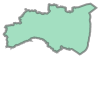

In [60]:
with open("fukushima.json") as file:
    fukushima_polygon = json.load(file)

fukushima = shape(fukushima_polygon)
fukushima

In [61]:
def in_fukushima(row):
    return fukushima.contains(Point(row["longitude"], row["latitude"]))

In [62]:
df = df[df.apply(in_fukushima, axis=1)]

In [63]:
len(df.index)

216452

In [64]:
df.to_csv("fukushima_filtered.csv", index=False)

In [65]:
df["captured time"].min(), df["captured time"].max()

(Timestamp('2018-08-27 08:11:51'), Timestamp('2018-10-21 01:00:22'))

In [66]:
import geohash

def compute_geohash(row):
    return geohash.encode(row["latitude"], row["longitude"], precision=6)

In [67]:
df["geohash"] = df.apply(compute_geohash, axis=1)

In [68]:
df.head()

,captured time,latitude,longitude,value,geohash
22,2018-10-21 01:00:22,37.796306,140.514413,19.0,xnezj2
25,2018-10-21 01:00:16,37.723330,140.476797,15.0,xneyse
27,2018-10-21 01:00:16,37.787500,140.552400,18.0,xneyyr
28,2018-10-21 01:00:16,37.796306,140.514413,61.0,xnezj2
30,2018-10-21 01:00:14,37.792805,140.930957,13.0,xnsnyz


In [69]:
grouped = df[["geohash", "value"]].groupby(["geohash"]).mean()

In [70]:
grouped.head()

,value
geohash,
xnecec,29.000000
xnecee,37.000000
xnecef,32.714286
xneceq,40.807692
xnecer,29.800000


In [71]:
for index, row in grouped.head(n=3).iterrows():
    print(index)
    print(row.value)
    print()

xnecec
29.0

xnecee
37.0

xnecef
32.714285714285715



In [72]:
grouped.to_csv("fukushima_grouped.csv")